# A slightly less naive and foolish keras model

(Not working yet)


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.layers.recurrent import LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.layers.wrappers import TimeDistributed
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tqdm import tqdm

from preprocess import *
from util import *

In [8]:
#TODO: shift data down to 0-89 instead of 19-...
NUM_POSSIBLE_ACTIONS = len(pitchToTuple(SILENCE, ambitus=(HIGHEST_PITCH-LOWEST_PITCH)*2))
EMBEDDING_DIMENSIONS=100
#MIN_SONG_LENGTH=200 #TODO figure out/look up

In [9]:
NUM_SONGS = 900

sop = useNumberHolds(loadData('Soprano')[:NUM_SONGS])
min_song_length = min(len(song) for song in sop) // 4 * 4 #trim to last measure
data = np.array([song[:min_song_length] for song in sop])


bass = useNumberHolds(loadData('Bass')[:NUM_SONGS])
trimmed_categorical_bass = [to_categorical(np.array(song[:min_song_length])-LOWEST_PITCH, nb_classes=NUM_POSSIBLE_ACTIONS) for song in bass]
labels = np.array(trimmed_categorical_bass)


In [10]:
data

array([[ 74, 163,  69, ..., 160,  64, 153],
       [ 74, 163,  69, ..., 160,  64, 153],
       [ 76, 165,  76, ..., 109,  69, 158],
       ..., 
       [ 19,  19,  19, ...,  72,  70, 159],
       [ 19,  19,  19, ..., 158,  71, 160],
       [ 19,  19,  19, ..., 171,  80,  79]])

In [11]:


model = Sequential()

model.add(Embedding(NUM_POSSIBLE_ACTIONS, EMBEDDING_DIMENSIONS, input_length=min_song_length))

model.add(LSTM(EMBEDDING_DIMENSIONS, return_sequences=True))
model.add(LSTM(EMBEDDING_DIMENSIONS, return_sequences=True))
model.add(LSTM(EMBEDDING_DIMENSIONS, return_sequences=True))
model.add(LSTM(EMBEDDING_DIMENSIONS, return_sequences=True))

#model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(NUM_POSSIBLE_ACTIONS)))

print(model.output_shape)
model.add(Activation('softmax'))

# Binary crossentropy?
model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])



(None, 80, 178)


In [12]:


model.fit(data, labels, nb_epoch=10, batch_size=32)

KeyboardInterrupt: 

In [96]:
output=model.predict(data[11, np.newaxis])
print(output.shape)
song_pitches = np.array([np.argmax(output[0, time, :]) for time in range(output.shape[1])])+LOWEST_PITCH
print(song_pitches)

(1, 80, 89)
[19 19 19 19 19 19 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55
 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20
 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55 20 55
 20 55 20 55 20]


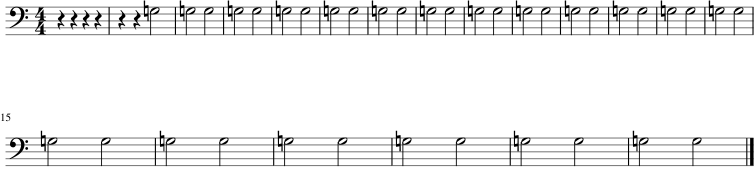

In [100]:
import util
import imp; imp.reload(util)
util.pitchToStream(song_pitches).show()